In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("air_quality.csv")
print(df.head())

   Temperature  Humidity  WindSpeed  NO2  PM25  AQI
0           29        65         12   40    60  132
1           31        70          8   55    80  175
2           27        55         15   35    45   98
3           33        60         10   60    78  160
4           26        50         20   30    35   88


In [5]:
X = df[["Temperature", "Humidity", "WindSpeed", "NO2", "PM25"]]
y = df["AQI"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [8]:
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 11.5
R² Score: 0.9359556786703601


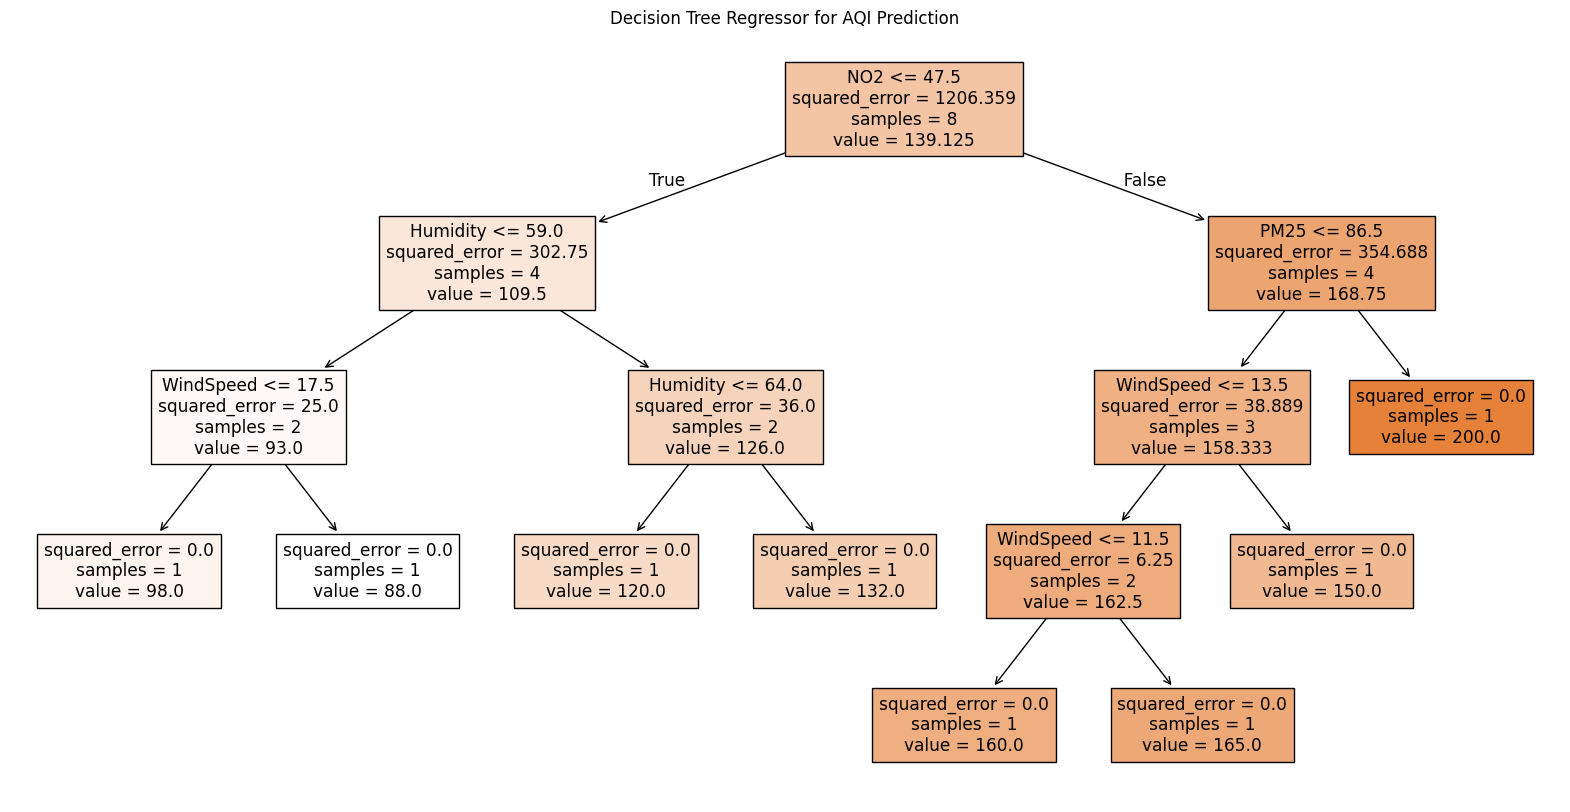

In [9]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True)
plt.title("Decision Tree Regressor for AQI Prediction")
plt.show()

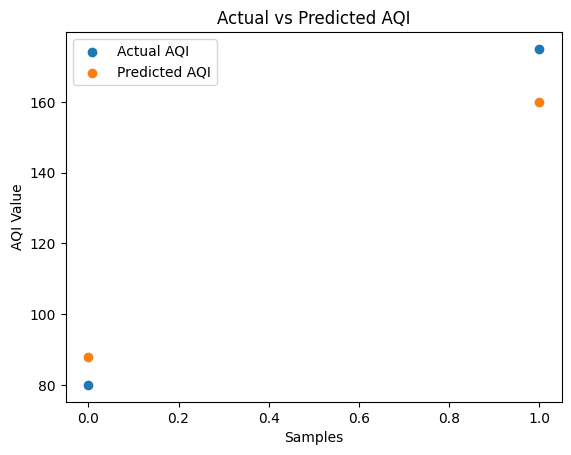

In [10]:
plt.scatter(range(len(y_test)), y_test, label="Actual AQI")
plt.scatter(range(len(y_pred)), y_pred, label="Predicted AQI")
plt.xlabel("Samples")
plt.ylabel("AQI Value")
plt.title("Actual vs Predicted AQI")
plt.legend()
plt.show()

In [11]:
importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
})
print(importance.sort_values(by="Importance", ascending=False))

       Feature  Importance
3          NO2    0.727512
4         PM25    0.134919
1     Humidity    0.120300
2    WindSpeed    0.017270
0  Temperature    0.000000


In [12]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)